In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re as re


In [2]:
# import data
df = pd.read_csv(r"C:\Users\Usuario\Desktop\Proyectos\Datos\movies\movies.csv")

df.head()




,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# check missing data
          
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# check data types
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df = df.dropna(subset = ['budget','gross','runtime','released'])
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [6]:
# remove .0 by changing data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['released'] = df['released'].astype('string')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [7]:
# separate released column into columns
new = df['released']
new

0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5435, dtype: string

In [8]:
# replace unnecesary characters
new = new.str.replace(',',' ')
new = new.str.replace('\(',' ')
new = new.str.replace('\)',' ')
new

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12396\1230256764.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  new = new.str.replace('\(',' ')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12396\1230256764.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new = new.str.replace('\)',' ')


0           June 13  1980  United States 
1            July 2  1980  United States 
2           June 20  1980  United States 
3            July 2  1980  United States 
4           July 25  1980  United States 
                      ...                
7648     January 17  2020  United States 
7649    February 14  2020  United States 
7650     January 17  2020  United States 
7651    February 21  2020  United States 
7652      August 28  2020  United States 
Name: released, Length: 5435, dtype: string

In [9]:
# get new columns
new = new.str.split('  ',expand=True)
new

,0,1,2
0,June 13,1980,United States
1,July 2,1980,United States
2,June 20,1980,United States
3,July 2,1980,United States
4,July 25,1980,United States
...,...,...,...
7648,January 17,2020,United States
7649,February 14,2020,United States
7650,January 17,2020,United States
7651,February 21,2020,United States


In [10]:
# insert new columns and drop old column
df['released_day'] = new[0]
df['released_year'] = new[1]
df['released_country'] = new[2]
df = df.drop(columns=['released'])
df



,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_day,released_year,released_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June 13,1980,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July 2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June 20,1980,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July 2,1980,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July 25,1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,January 17,2020,United States
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,February 14,2020,United States
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,January 17,2020,United States
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,February 21,2020,United States


In [11]:
df.dtypes

name                 object
rating               object
genre                object
year                  int64
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget                int64
gross                 int64
company              object
runtime               int64
released_day         string
released_year        string
released_country     string
dtype: object

In [12]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_day,released_year,released_country
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,December 18,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,April 26,2019,United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,December 19,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,December 18,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,April 27,2018,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,June 4,1994,South Korea
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,May 11,2001,Canada
272,Parasite,R,Horror,1982,3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,March 12,1982,United States
2417,Madadayo,NaN,Drama,1993,7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,April 17,1993,Japan


In [13]:
# drop duplicates
df = df.drop_duplicates()
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_day,released_year,released_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June 13,1980,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July 2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June 20,1980,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July 2,1980,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July 25,1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,January 17,2020,United States
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,February 14,2020,United States
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,January 17,2020,United States
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,February 21,2020,United States


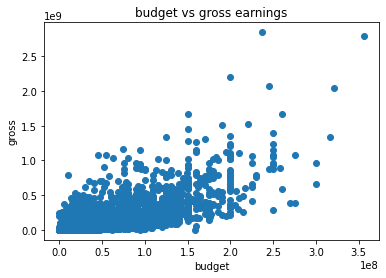

In [14]:
# check which variables are more correlated to 'gross'. Check 'budget','score','genre' probably have high correlation
# build scatterplot on 'budget' and 'score'

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('budget vs gross earnings')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()






<AxesSubplot:xlabel='budget', ylabel='gross'>

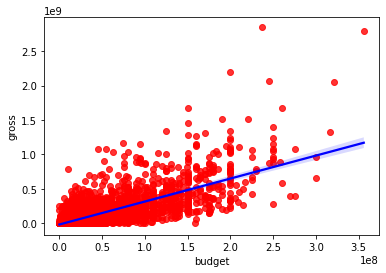

In [15]:
# regression plot using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [16]:
# since there is a correlation, it is possible to quantify it. Can be pearson, kendall, spearman
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055391,0.205852,0.327793,0.274354,0.074203
score,0.055391,1.000000,0.473789,0.071821,0.222100,0.414580
votes,0.205852,0.473789,1.000000,0.440035,0.614895,0.352437
budget,0.327793,0.071821,0.440035,1.000000,0.740410,0.318595
gross,0.274354,0.222100,0.614895,0.740410,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


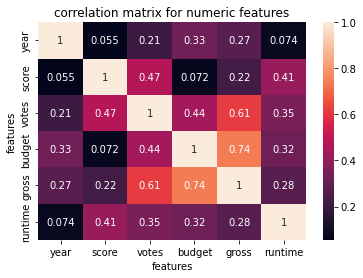

In [17]:
# there is a high correlation between 'budget' and 'gross'
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric features')
plt.xlabel('features')
plt.ylabel('features')
plt.show()

In [18]:
# look at genre since it is not a numeric attribute
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_day,released_year,released_country
0,4705,6,6,1980,8.4,927000.0,1800,2840,700,46,19000000,46998772,1432,146,June 13,1980,United States
1,3942,6,1,1980,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104,July 2,1980,United States
2,3653,4,0,1980,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124,June 20,1980,United States
3,205,4,4,1980,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88,July 2,1980,United States
4,734,6,4,1980,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98,July 25,1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124,January 17,2020,United States
7649,3568,4,0,2020,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99,February 14,2020,United States
7650,1156,4,1,2020,5.6,53000.0,1814,2835,1474,47,175000000,245487753,1403,101,January 17,2020,United States
7651,3991,4,1,2020,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100,February 21,2020,United States


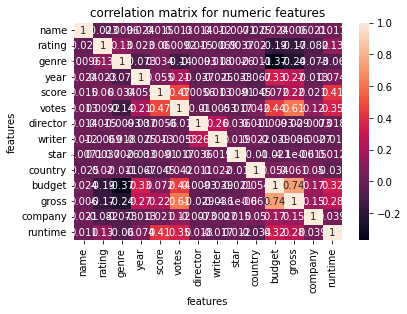

<Figure size 720x720 with 0 Axes>

In [19]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric features')
plt.xlabel('features')
plt.ylabel('features')
plt.figure(figsize=(10,10))
plt.show()

In [20]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023011,0.009647,0.024418,0.014981,0.012923,0.013698,0.011576,-0.007111,-0.024563,0.023695,0.005973,0.021216,0.010801
rating,-0.023011,1.000000,0.128076,0.022705,0.059517,0.009241,0.014848,-0.006881,0.003740,0.020160,-0.186890,-0.168829,-0.082189,0.133239
genre,0.009647,0.128076,1.000000,-0.072815,0.033805,-0.136573,-0.009300,0.017790,0.002638,-0.010768,-0.368932,-0.244499,-0.073306,-0.060186
year,0.024418,0.022705,-0.072815,1.000000,0.055391,0.205852,-0.036942,-0.024794,-0.032788,-0.066730,0.327793,0.274354,-0.013061,0.074203
score,0.014981,0.059517,0.033805,0.055391,1.000000,0.473789,0.005577,0.013130,0.009139,-0.044624,0.071821,0.222100,0.021055,0.414580
votes,0.012923,0.009241,-0.136573,0.205852,0.473789,1.000000,-0.010196,-0.005301,-0.017134,0.042173,0.440035,0.614895,0.119367,0.352437
director,0.013698,0.014848,-0.009300,-0.036942,0.005577,-0.010196,1.000000,0.262973,0.036289,0.011107,-0.009341,-0.029365,-0.007337,0.018082
writer,0.011576,-0.006881,0.017790,-0.024794,0.013130,-0.005301,0.262973,1.000000,0.019255,0.022076,-0.039448,-0.035920,-0.002652,-0.016671
star,-0.007111,0.003740,0.002638,-0.032788,0.009139,-0.017134,0.036289,0.019255,1.000000,-0.010140,-0.021283,-0.000004,0.015087,0.012439
country,-0.024563,0.020160,-0.010768,-0.066730,-0.044624,0.042173,0.011107,0.022076,-0.010140,1.000000,0.054366,0.060952,0.049560,-0.033554


In [21]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name       1.000000
         rating    -0.023011
         genre      0.009647
         year       0.024418
         score      0.014981
                      ...   
runtime  country   -0.033554
         budget     0.318595
         gross      0.275596
         company    0.038752
         runtime    1.000000
Length: 196, dtype: float64

In [22]:
# sort values
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.368932
budget   genre     -0.368932
gross    genre     -0.244499
genre    gross     -0.244499
budget   rating    -0.186890
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64

In [23]:
# can conclude that votes and budget have the highest correlation to gross earnings
high_corr = sorted_pairs[(sorted_pairs) > 0.5 ]
high_corr


votes     gross       0.614895
gross     votes       0.614895
budget    gross       0.740410
gross     budget      0.740410
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64